# Hierarchy Clustering
**Clustering** merupakan salah satu metode **`Unsupervised Learning`** yang bertujuan untuk melakukan pengelompokan data berdasasrkan kemiripan/jarak antar data. Clustering memiliki karakteristik dimana anggota dalam satu cluster memiliki kemiripan yang sama atau jarak yang sangat dekat, sementara anggota antar cluster memiliki kemiripan yang sangat berbeda atau jarak yang sangat jauh.

**`Hierarchical Clustering`**, pengelompokan data dilakukan dengan membuat suatu bagan hirarki **`(dendrogram)`** dengan tujuan menunjukkan kemiripan antar data. Setiap data yang mirip akan memiliki hubungan hirarki yang dekat dan menbentuk cluster data. Bagan hirarki akan terus terbentuk hingga seluruh data terhubung dalam bagan hirarki tersebut. Cluster dapat dihasilkan dengan memotong bagan hirarki pada level tertentu. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\mpg_raw.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# menampilkan jumlah kolom dan baris
df.shape

(398, 9)

In [5]:
# menampilkan sekilas info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
# ringkasan statistik
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<b> Data Cliening 

In [7]:
# pegecekan data missing values
df_null = round(100 * (df.isna().sum())/len(df), 2)
df_null

mpg             0.00
cylinders       0.00
displacement    0.00
horsepower      1.51
weight          0.00
acceleration    0.00
model_year      0.00
origin          0.00
name            0.00
dtype: float64

In [8]:
# menghapus missing values
df = df.dropna()
df.shape

(392, 9)

In [9]:
# nama kolom pada dataframe
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [10]:
sns.set_style('darkgrid')

In [11]:
# pengecekan data outlier menggunakan boxplot

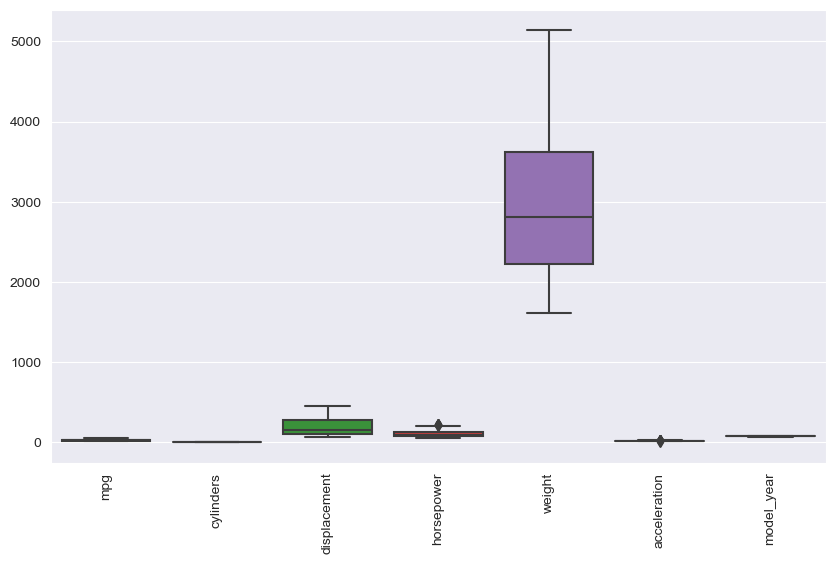

In [12]:
# membuat atribute baru
atributes = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model_year']
plt.figure(figsize=(10,6), dpi =100)
sns.boxplot(data = df[atributes])
plt.xticks(rotation = 90  )
plt.show()

* Dari boxplot diatas terdapat data yng mempunyai outlier yang ditandai oleh titik atribute horsepower dan acceleration
untuk data yang memiliki outlier akan dihapus

In [13]:
# outlier horsepower
Q1 = df.horsepower.quantile(0.05)
Q3 = df.horsepower.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.horsepower >= Q1 - 1.5 * IQR) & (df.horsepower <= Q3 + 1.5 * IQR)]

# outlier acceleration
Q1 = df.acceleration.quantile(0.05)
Q3 = df.acceleration.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.acceleration >= Q1 - 1.5 * IQR) & (df.acceleration <= Q3 + 1.5 * IQR )]

df.shape

(392, 9)

<b> EDA (exploratory data analysis) dan Data Visualisasi

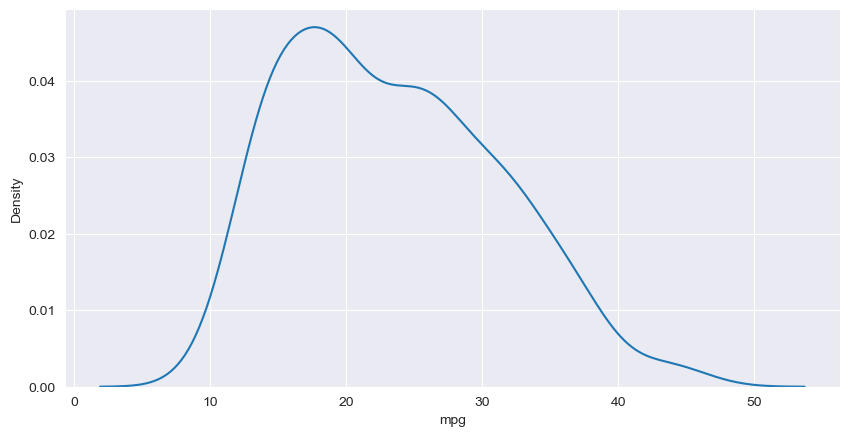

In [14]:
plt.figure(figsize = (10,5), dpi=100)
sns.kdeplot(x='mpg',data=df);

<Figure size 800x500 with 0 Axes>

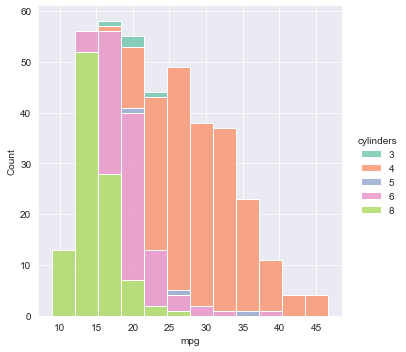

In [15]:
plt.figure(figsize=(8,5), dpi=100)
sns.displot(x='mpg', hue='cylinders', data=df, multiple="stack", palette='Set2');

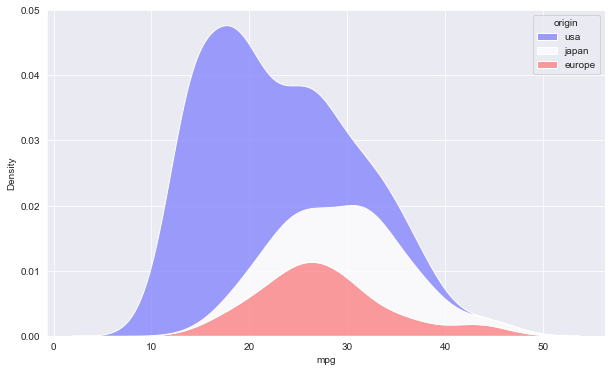

In [16]:
plt.figure(figsize =(10,6))
sns.kdeplot(x='mpg', hue='origin', multiple='stack', palette='bwr', data=df);

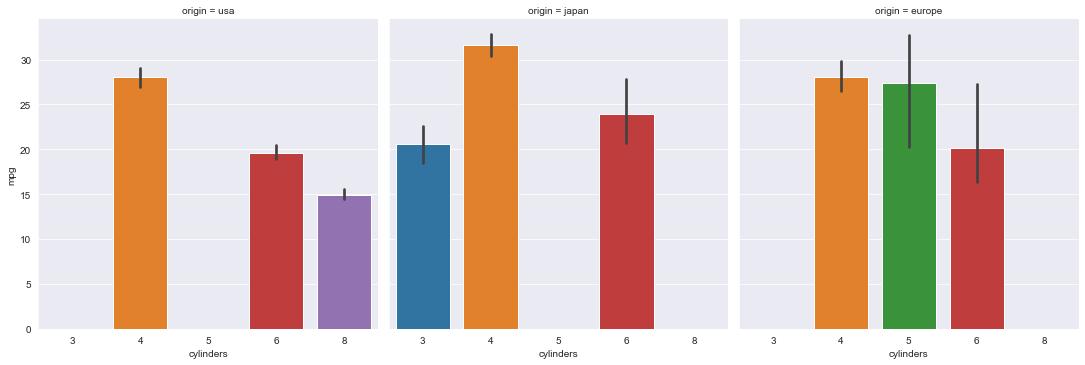

In [17]:
sns.catplot(x='cylinders', y='mpg', col='origin', data=df, kind='bar');

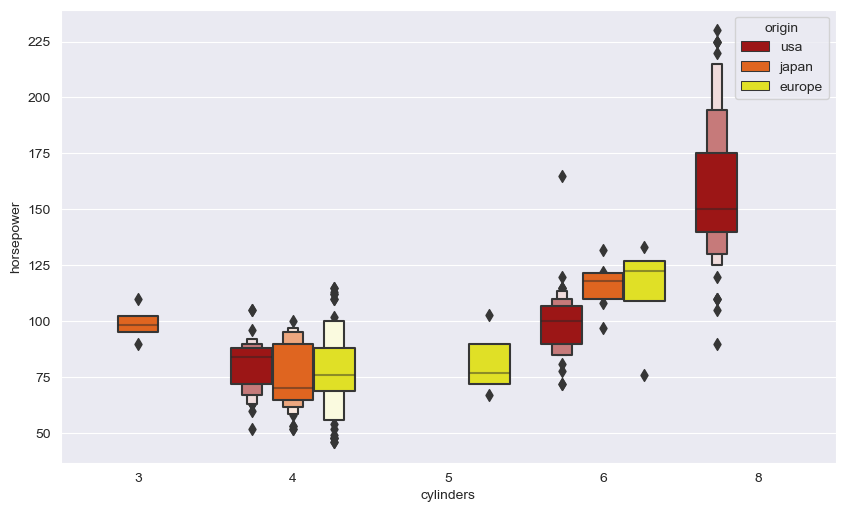

In [18]:
plt.figure(figsize=(10,6), dpi=100)
sns.boxenplot(x='cylinders', y='horsepower',hue='origin', data=df, palette='hot');

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

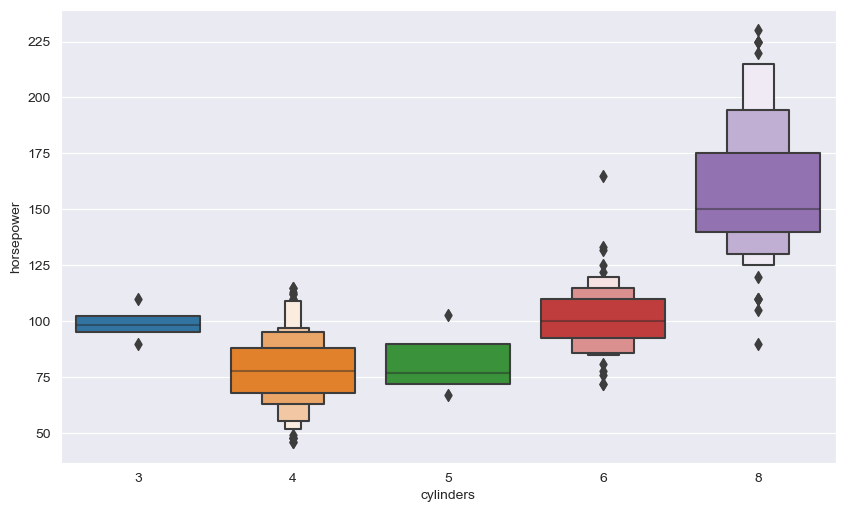

In [19]:
plt.figure(figsize=(10,6), dpi=100)
sns.boxenplot(x='cylinders', y='horsepower',data=df)

<AxesSubplot:xlabel='cylinders', ylabel='acceleration'>

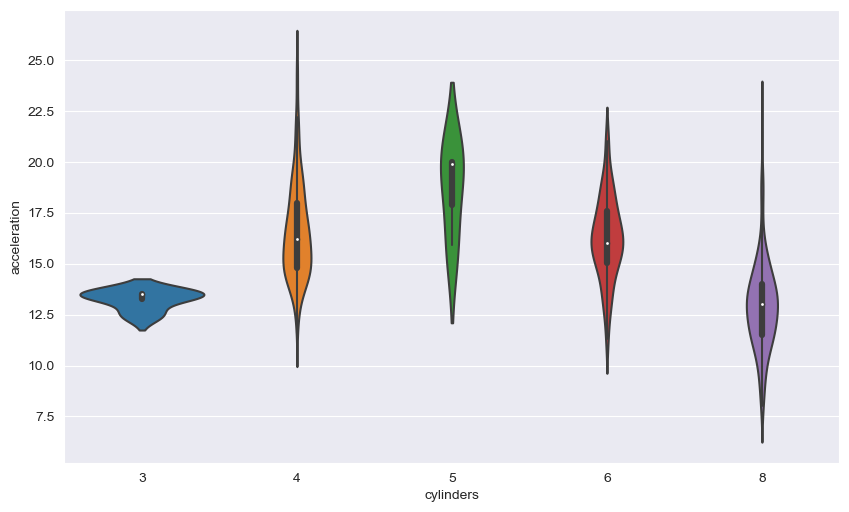

In [20]:
plt.figure(figsize=(10,6), dpi=100)

sns.violinplot(x='cylinders', y='acceleration',data=df )

<AxesSubplot:xlabel='model_year', ylabel='count'>

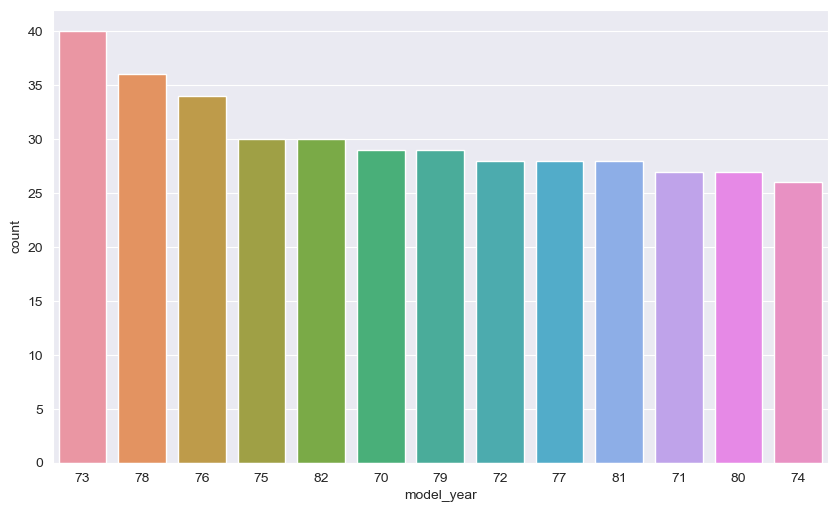

In [21]:
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(x='model_year', data=df, order=df['model_year'].value_counts().index)

<AxesSubplot:xlabel='origin', ylabel='count'>

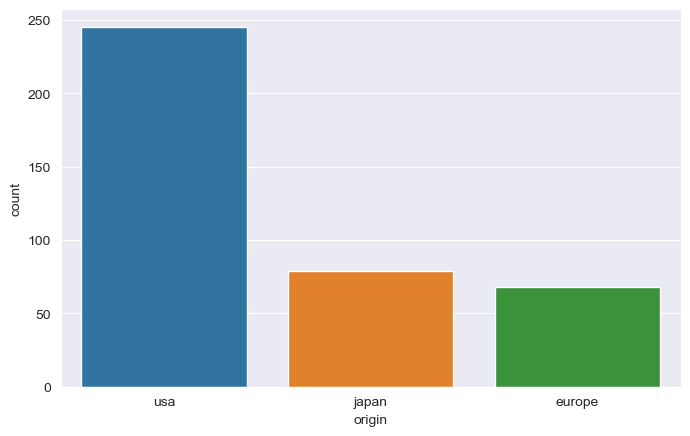

In [22]:
plt.figure(figsize= (8,5), dpi=100)
sns.countplot(x='origin', data=df)

<b> Feature engenering

In [23]:
# Membuat data dummies dan menghapus kolom name
df_dummies = pd.get_dummies(df.drop('name', axis=1))
df_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [24]:
# melakukan scaling data menggunakan MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [25]:
minmax = MinMaxScaler()

In [26]:
df_dummies_minmax = minmax.fit_transform(df_dummies)

In [27]:
df_dummies_minmax

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [28]:
df_dummies_minmax.shape

(392, 10)

* Setelah data sudah di preprocessing kemudian akan di kembalikan menjadi data frame

In [29]:
scaler_data = pd.DataFrame(df_dummies_minmax, columns=df_dummies.columns)
scaler_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


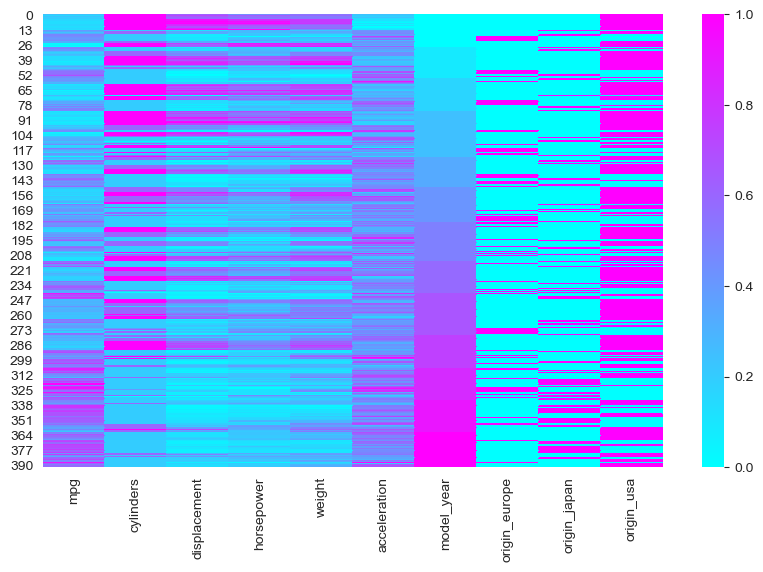

In [30]:
plt.figure(figsize=(10,6), dpi=100)
sns.heatmap(scaler_data, cmap='cool');

<Figure size 1000x600 with 0 Axes>

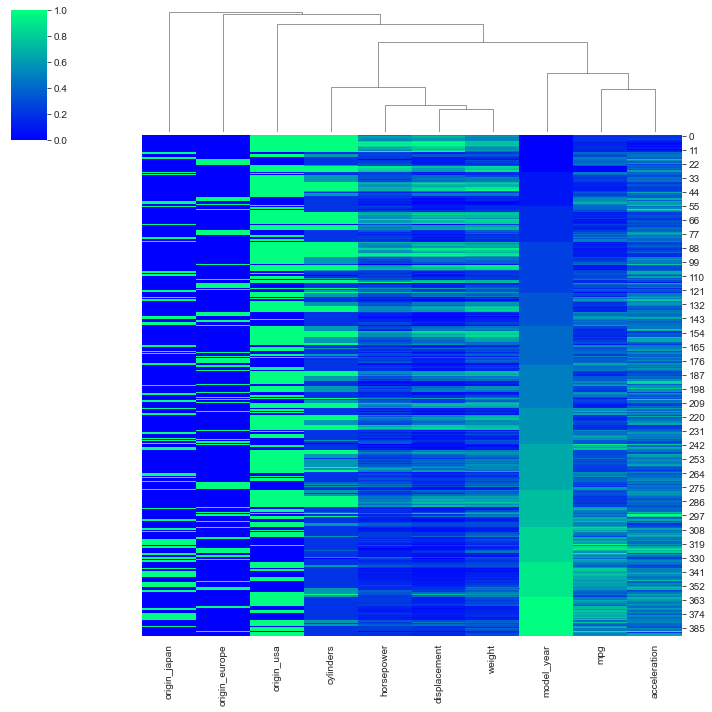

In [31]:
plt.figure(figsize=(10,6),dpi=100)
sns.clustermap(scaler_data, row_cluster=False, cmap='winter');

In [32]:
scaler_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454,-0.565161
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209,0.610494
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825,0.655936
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936,0.489625
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929,0.600978
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.208298,0.115020,-0.258224
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.037745,0.199841,-0.136065
origin_europe,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,1.000000,-0.230157,-0.591434
origin_japan,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.230157,1.000000,-0.648583
origin_usa,-0.565161,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,-0.591434,-0.648583,1.000000


<Figure size 800x500 with 0 Axes>

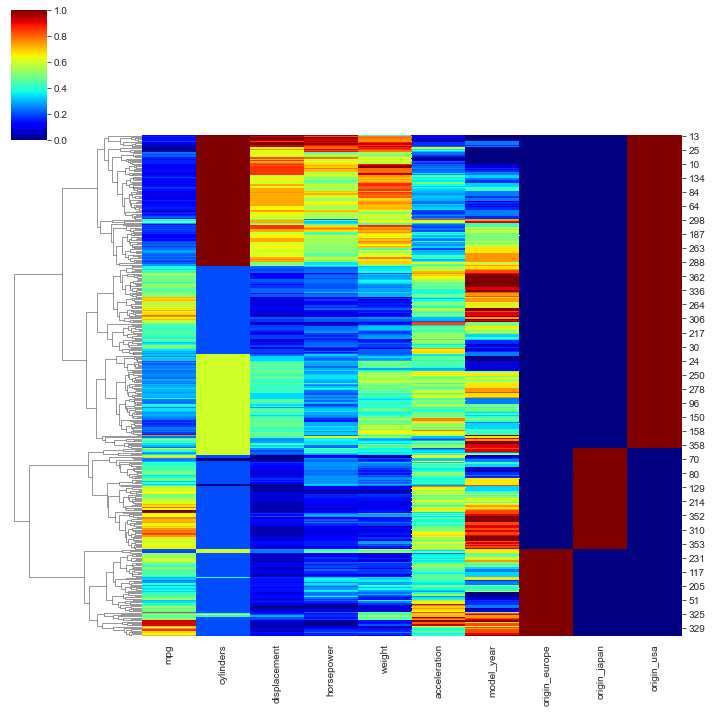

In [33]:
plt.figure(figsize=(8,5), dpi=100)
sns.clustermap(scaler_data, col_cluster=False, cmap='jet');

* Membuat model dengan model Agglomerative Cluster

## Model Agglomerative clustering

* membuat model sederhana untuk menjadi pertimbangan dalam mencari jumlah cluster

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
model = AgglomerativeClustering(n_clusters=4)

In [36]:
custer_labels = model.fit_predict(scaler_data)

In [37]:
custer_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

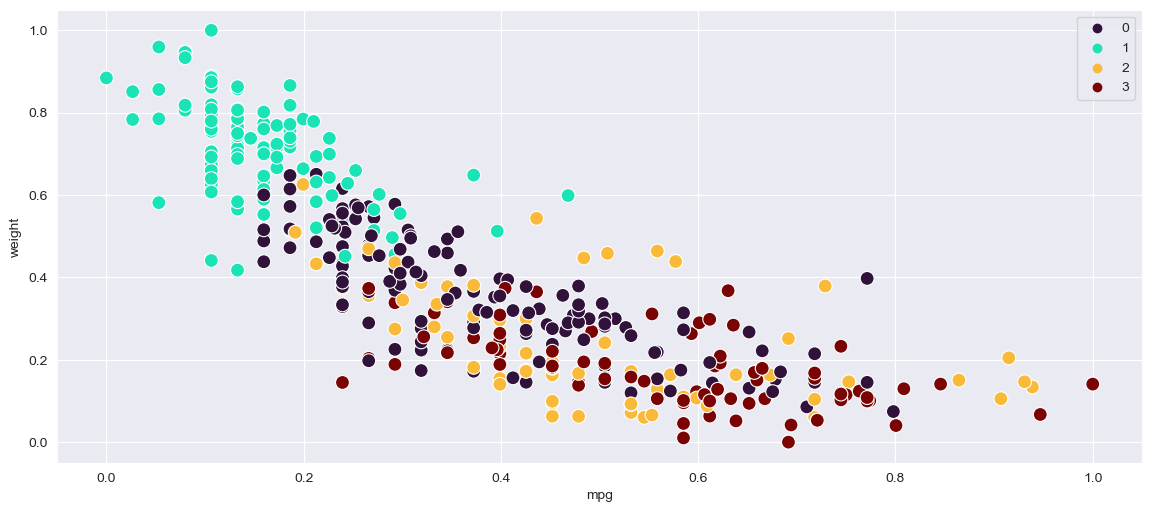

In [38]:
plt.figure(figsize=(14,6), dpi=100)
sns.scatterplot(x='mpg', y='weight', hue=custer_labels,data=scaler_data, palette='turbo', s=100);

In [39]:
maxdist_twopoint = np.sqrt(len(scaler_data.columns))
maxdist_twopoint

3.1622776601683795

* Membuat model kembali

In [40]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [41]:
model_cluster = model.fit_predict(scaler_data)

In [42]:
model_cluster

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

In [43]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

### linkage matrix


In [44]:
linkage_matrix = hierarchy.linkage(model.children_)

In [45]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

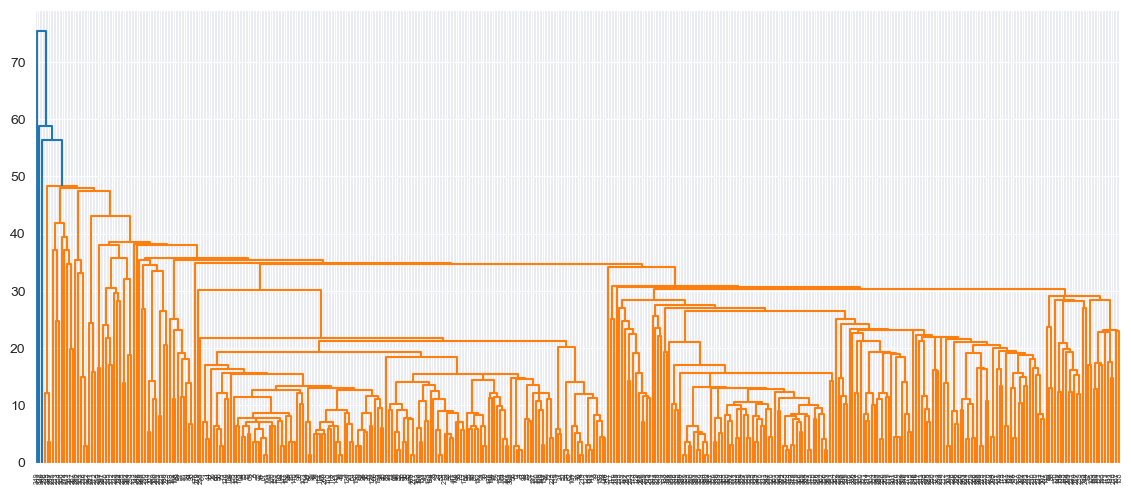

In [46]:
plt.figure(figsize=(14,6), dpi=100)
dendro = dendrogram(linkage_matrix);

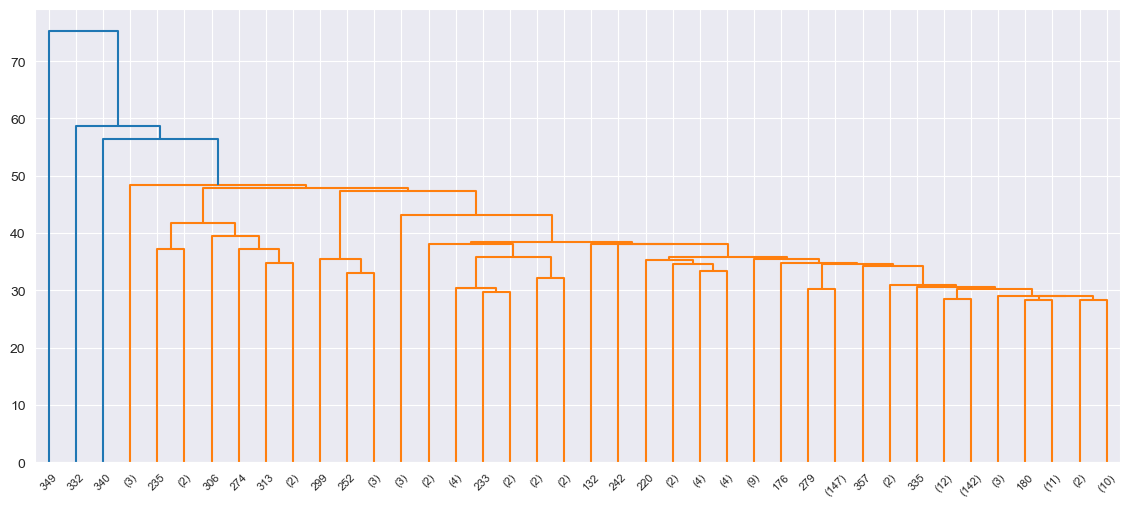

In [47]:
plt.figure(figsize=(14,6), dpi=100)
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=40);

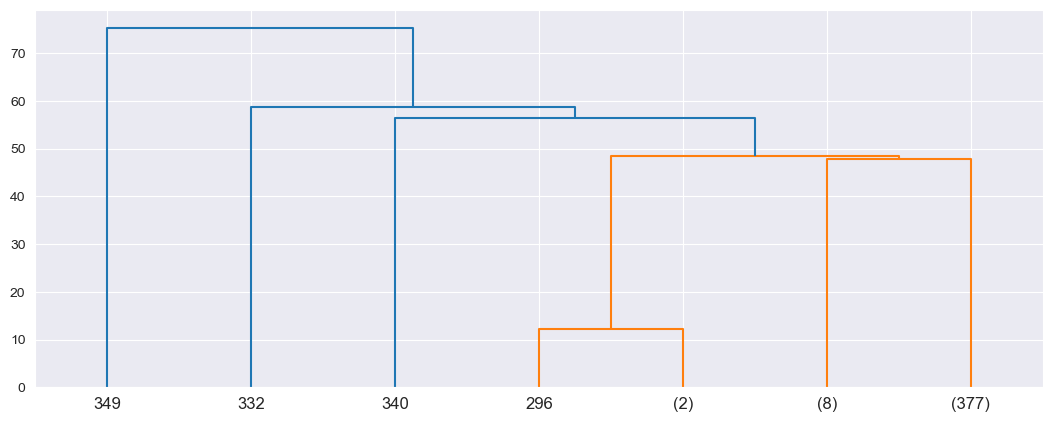

In [48]:
plt.figure(figsize=(13,5), dpi=100)
dendro = dendrogram(linkage_matrix, truncate_mode='level', p=4);

In [49]:
scaler_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454,-0.565161
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209,0.610494
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825,0.655936
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936,0.489625
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929,0.600978
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.208298,0.115020,-0.258224
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.037745,0.199841,-0.136065
origin_europe,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,1.000000,-0.230157,-0.591434
origin_japan,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.230157,1.000000,-0.648583
origin_usa,-0.565161,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,-0.591434,-0.648583,1.000000


In [50]:
# matrix
matrix = scaler_data.corr()

# mask 
mask = np.zeros_like(matrix)

mask[np.triu_indices_from(matrix)]=True

In [51]:
sns.set_style('white')

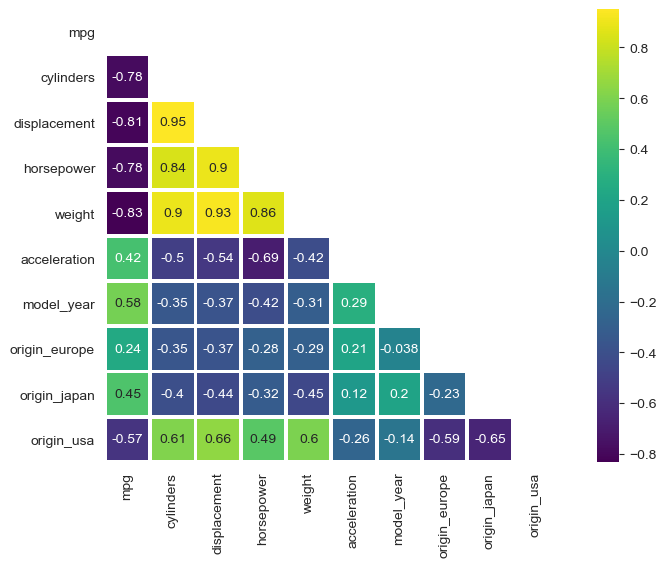

In [52]:
plt.figure(figsize=(10,6), dpi=100)
sns.heatmap(matrix, mask= mask, lw=2, annot=True, cmap='viridis', square=True);

In [53]:
scaler_data['mpg'].max()

1.0000000000000002

In [54]:
scaler_data['mpg'].idxmax()

320

In [55]:
scaler_data['mpg'].idxmin()

28

<b> Mencari jarak Euclidien

In [56]:
a = scaler_data.iloc[320]
b = scaler_data.iloc[28]
jarak = np.linalg.norm(a-b)
print('Jarak Euclidien :', jarak)

Jarak Euclidien : 2.3852929970374714


<b> Jarak Maksimal

In [57]:
max_jarak = np.sqrt(len(scaler_data.columns))
print('Jarak Maksimal :', max_jarak)

Jarak Maksimal : 3.1622776601683795


## Final Model Berdasarkan Jarak Euclidien

In [58]:
model = AgglomerativeClustering(n_clusters = None, distance_threshold=2)

In [59]:
fix_cluster = model.fit_predict(scaler_data)
fix_cluster

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

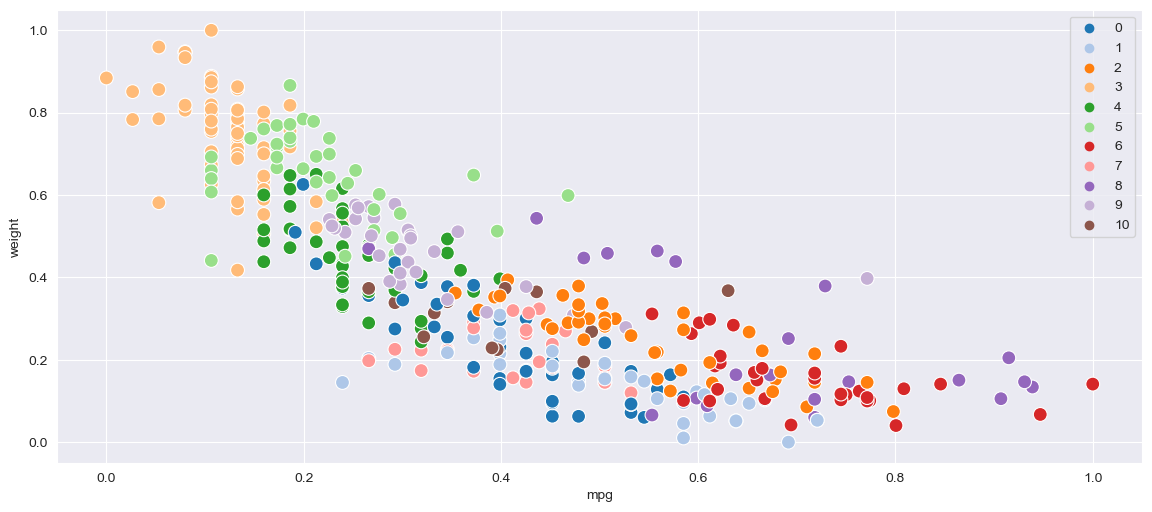

In [60]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,6), dpi=100)
sns.scatterplot(x='mpg', y='weight', hue=fix_cluster,data=scaler_data,palette='tab20',s=100);

In [61]:
data_unik = np.unique(fix_cluster)
print(data_unik)

[ 0  1  2  3  4  5  6  7  8  9 10]


In [62]:
jumlah_cluster = len(np.unique(fix_cluster))
print('Jumlah cluster berdasarkan jarak Euclidien :', jumlah_cluster )

Jumlah cluster berdasarkan jarak Euclidien : 11


## linkage Matrix

In [63]:
linkage_matrix = hierarchy.linkage(model.children_)

In [64]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

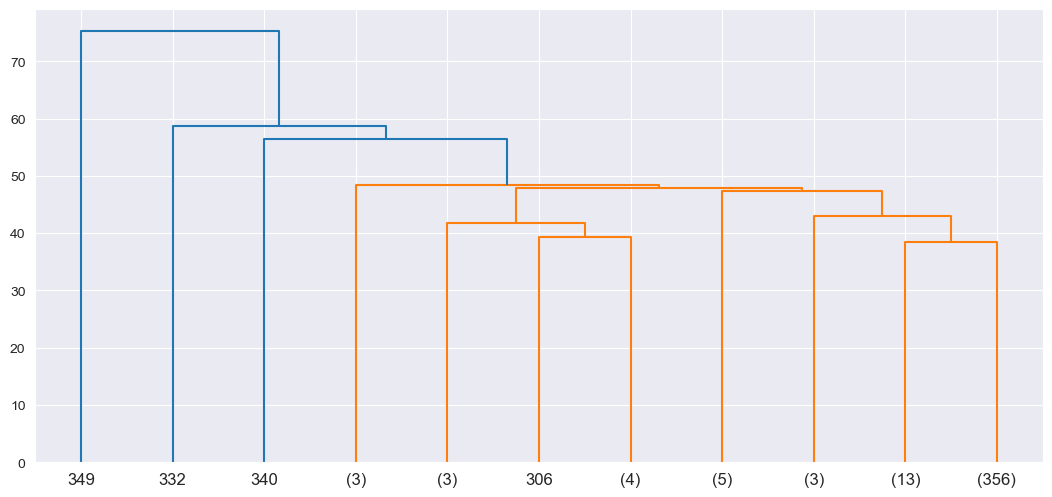

In [65]:
plt.figure(figsize=(13,6), dpi=100)
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=11);

In [66]:
df['cluster_id'] = fix_cluster

In [67]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,cluster_id
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,3
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,3
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,3
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,3
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,3
